# 2 - Bellman Equation and the Action-State Value

![Bellman_1](https://user-images.githubusercontent.com/44867923/141012209-d05f4699-fd8f-48b9-9e9a-a574687e7d75.jpg)
![Bellman_2](https://user-images.githubusercontent.com/44867923/141012134-09ff0d88-4ce9-43af-8b04-d535cf24d897.jpg)

In [6]:
import gym
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Create Environment: Deterministic Frozen-Lake

In [12]:
env = gym.make("FrozenLake-v1", is_slippery=True)

### Create Q Table: Value of every action in every state

In [13]:
Q = np.zeros((env.observation_space.n, env.action_space.n))
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

### Agent: play the environment and update the Q table

In [14]:
gamma = 0.9
for ep in range(1000):
    obs = env.reset()
    done = False

    while not done:

        action = env.action_space.sample()
        next_obs, reward, done, _ = env.step(action)


        actual_obs_action_value = reward + gamma*Q[next_obs].max()
        Q[obs, action] = actual_obs_action_value

        obs = next_obs


### Plot Q Table: action value for every state

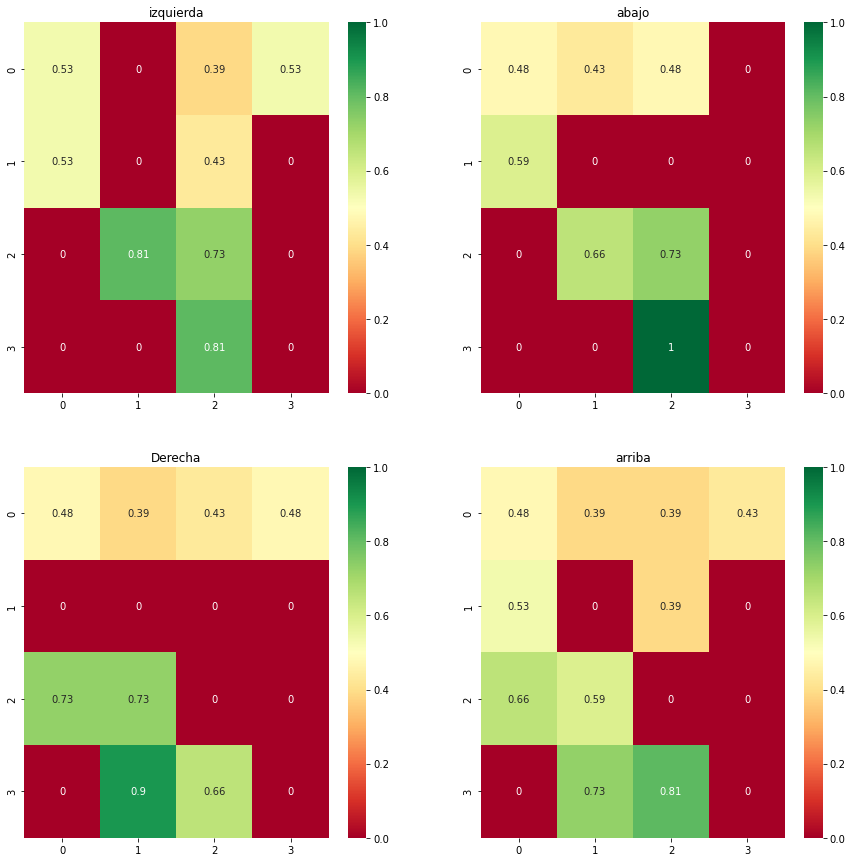

In [15]:
fig, ax = plt.subplots(2,2, figsize=(15,15))

plot = ax[0,0]
plot.set_title("izquierda")
values = Q.T[0].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[0,1]
plot.set_title("abajo")
values = Q.T[1].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[1,0]
plot.set_title("Derecha")
values = Q.T[2].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

plot = ax[1,1]
plot.set_title("arriba")
values = Q.T[3].reshape(4,4)
sns.heatmap(values, cmap="RdYlGn", annot=True, ax=plot, vmax=1)

_ = plt.plot()

### Plot Q* Table: action with highest value for every state

<AxesSubplot:>

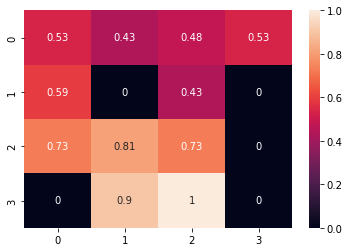

In [16]:
sns.heatmap(data=Q.max(axis=1).reshape(4,4), annot=True)